In [ ]:
from openai import OpenAI
import pandas as pd

# Initialize the OpenAI client
client = OpenAI()

df = pd.read_csv('adverbs.csv')

# Define a translation function using the OpenAI API
def translate(adv):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."},
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect adverb into English using word-by-word translation."},
            {"role": "assistant", "content": "OK, I understand. I am ready for the adverb translation."},
            {"role": "user", "content": "ديما"},
            {"role": "assistant", "content": "Always"},
            {"role": "user", "content":  f'{adv}' }

        ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

# Apply the translation function to the 'darija_ar' column
df['adv'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df)


In [6]:
word2 ='else'
sysnet = wn.synsets(word2, pos =wn.ADV)
print(sysnet)

[]


[(2, 'Always', 'always', 1.0, True), (3, 'Not', 'not', 1.0, True), (4, 'Mostly', 'often', 0.3333333333333333, False), (5, 'Soon', 'soon', 1.0, True), (6, 'Tomorrow', 'early', 0.3333333333333333, False), (7, 'A_little', 'slowly', 0.3333333333333333, False), (8, 'With_enthusiasm', 'carefully', 0, False), (9, 'It_is_possible', 'perhaps', 0, False), (10, 'Here', 'here', 1.0, True), (11, 'Right_now', 'here', 0, False), (12, 'Slowly', 'there', 0.3333333333333333, False), (13, 'Close', 'nearby', 0.3333333333333333, False), (14, 'Up', 'upstairs', 0.3333333333333333, False), (15, 'From_after', 'later', 0, False), (16, 'Now', 'now', 1.0, True), (17, 'A_little', 'a_little', 1.0, True), (18, 'A_lot', 'a_lot', 1.0, True), (19, 'Completely', 'totally', 1.0, True), (20, 'In_the_first_place', 'instantly', 0.3333333333333333, False), (21, 'Almost', 'almost', 1.0, True), (22, 'Time_time', 'sometimes', 0, False), (23, 'After_many_times', 'sometimes', 0, False), (24, 'Rarely', 'rarely', 1.0, True), (25, '

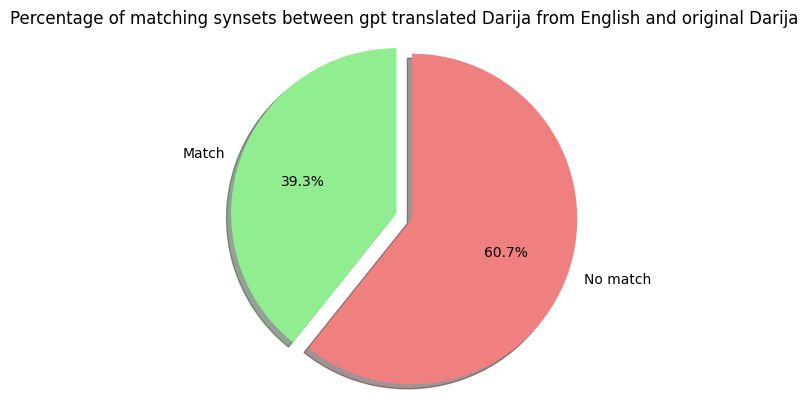

In [5]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

eng = df['eng']
transl = df['adv']

transl = [verb.replace(" ", "_") for verb in transl]
eng = [verb.replace(" ", "_") for verb in eng]

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.ADV)
    synsets2 = wn.synsets(word2, pos=wn.ADV)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((i+2, word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")
plt.show()
